In [42]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')



# 2.1 Forward Gravity: Simple example


Importing gempy



In [43]:
import gempy as gp
from gempy.assets.geophysics import GravityPreprocessing

# Aux imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

np.random.seed(1515)
#pd.set_option('precision', 2)

In [44]:
data_path = 'C:/RWTH_Aachen/thesis/GemPy_Model_from_Andrea/mod3/fault_angle_test/angles/newDensity/Fault_model'

In [45]:
geo_model = gp.load_model('Fault_model', path=data_path)

Active grids: ['regular']


In [46]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Fault_Series2,2,Fault,True,True,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [47]:
geo_model.surfaces

,surface,series,order_surfaces,color,id,value_0
0,Viersen_Fault,Fault_Series,1,#527682,1,0.000000
1,Viersen_Div1,Fault_Series2,1,#527682,2,0.000000
2,Base_TertiaryE,Strat_Series,1,#ffbe00,3,2.600000
3,Top_DevonianE,Strat_Series,2,#728f02,4,2.650000
4,Base_DevonianE,Strat_Series,3,#4878d0,5,2.800000
5,BasementE,Strat_Series,4,#ff3f20,6,3.500000
6,Base_TertiaryW,Strat_Series,5,#ffbe00,7,2.600000
7,Top_DevonianW,Strat_Series,6,#728f02,8,2.650000
8,Base_DevonianW,Strat_Series,7,#4878d0,9,2.800000
9,basement,Basement,1,#ff3f20,10,3.500000


In [48]:
geo_model.add_surface_values([0, 
                              0, 
                              2.6,  
                              2.65,
                              2.8,
                              3.5,
                              2.6,
                              2.65,
                              2.8,
                              3.5,], ['value_0'])

,surface,series,order_surfaces,color,id,value_0
0,Viersen_Fault,Fault_Series,1,#527682,1,0.000000
1,Viersen_Div1,Fault_Series2,1,#527682,2,0.000000
2,Base_TertiaryE,Strat_Series,1,#ffbe00,3,2.600000
3,Top_DevonianE,Strat_Series,2,#728f02,4,2.650000
4,Base_DevonianE,Strat_Series,3,#4878d0,5,2.800000
5,BasementE,Strat_Series,4,#ff3f20,6,3.500000
6,Base_TertiaryW,Strat_Series,5,#ffbe00,7,2.600000
7,Top_DevonianW,Strat_Series,6,#728f02,8,2.650000
8,Base_DevonianW,Strat_Series,7,#4878d0,9,2.800000
9,basement,Basement,1,#ff3f20,10,3.500000


C:\Users\tgluz\anaconda3\envs\carlos_gp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


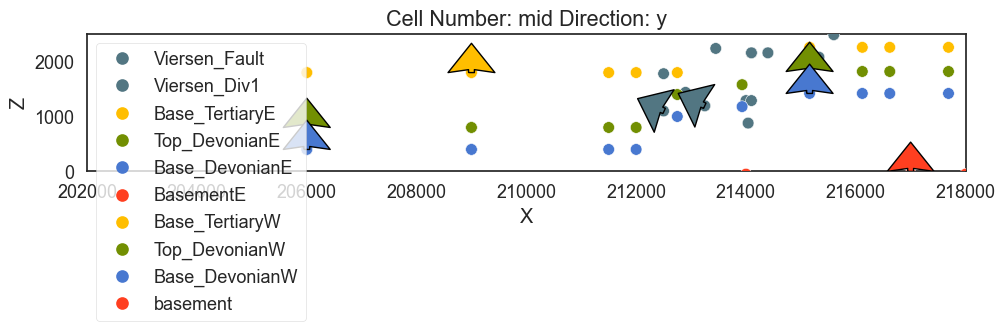

In [49]:
gp.plot_2d(geo_model)

In [50]:
gpv = gp.plot_3d(geo_model, image=False,  plotter_type='basic', )

## Creating grid




First we need to define the location of the devices. For this example we
can make a map:




In [51]:
grav_res = 20
X = np.linspace(202000, 218000, grav_res)
Y = np.linspace(378000, 392000, grav_res)
Z = 2500
xyz = np.meshgrid(X, Y, Z)
xy_ravel = np.vstack(list(map(np.ravel, xyz))).T
xy_ravel

array([[202000.        , 378000.        ,   2500.        ],
       [202842.10526316, 378000.        ,   2500.        ],
       [203684.21052632, 378000.        ,   2500.        ],
       ...,
       [216315.78947368, 392000.        ,   2500.        ],
       [217157.89473684, 392000.        ,   2500.        ],
       [218000.        , 392000.        ,   2500.        ]])

We can see the location of the devices relative to the model data:




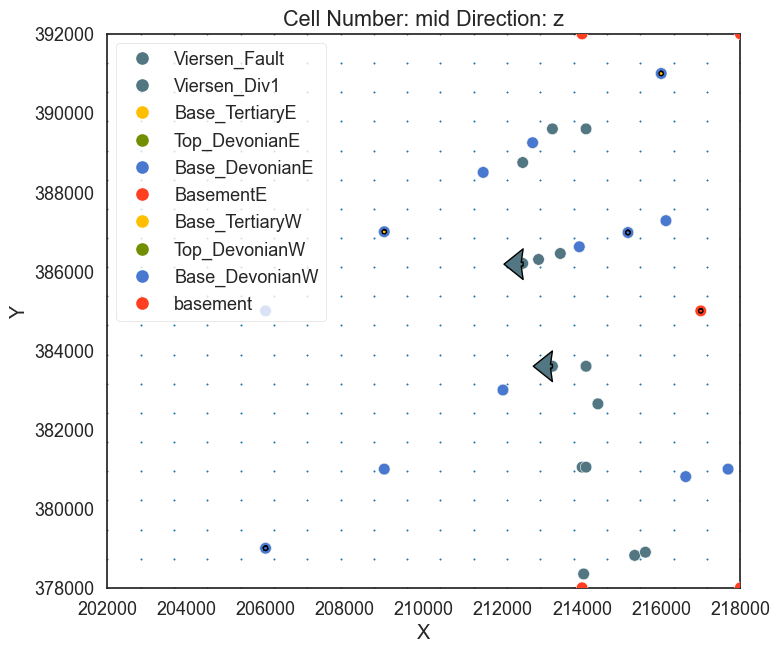

In [52]:
gp.plot_2d(geo_model, direction='z', show=False)
plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
plt.show()

Now we need to create the grid centered on the devices (see:
https://github.com/cgre-aachen/gempy/blob/master/notebooks/tutorials/ch1-3-Grids.ipynb)




In [53]:
geo_model.set_centered_grid(xy_ravel, resolution=[10, 10, 15], radius=5000)

Active grids: ['regular' 'centered']


Grid Object. Values: 
array([[ 2.02080000e+05,  3.78070000e+05,  2.50000000e+01],
       [ 2.02080000e+05,  3.78070000e+05,  7.50000000e+01],
       [ 2.02080000e+05,  3.78070000e+05,  1.25000000e+02],
       ...,
       [ 2.23000000e+05,  3.97000000e+05, -9.07684808e+02],
       [ 2.23000000e+05,  3.97000000e+05, -2.11811404e+03],
       [ 2.23000000e+05,  3.97000000e+05, -3.80000000e+03]])

In [54]:
geo_model.grid.centered_grid.kernel_centers

array([[-5000.        , -5000.        ,  -300.        ],
       [-5000.        , -5000.        ,  -360.        ],
       [-5000.        , -5000.        ,  -383.36972966],
       ...,
       [ 5000.        ,  5000.        , -3407.68480754],
       [ 5000.        ,  5000.        , -4618.11403801],
       [ 5000.        ,  5000.        , -6300.        ]])

Now we need to compute the component tz (see
https://github.com/cgre-achen/gempy/blob/master/notebooks/tutorials/ch2-2-Cell_selection.ipynb)




In [55]:
g = GravityPreprocessing(geo_model.grid.centered_grid)

In [56]:
tz = g.set_tz_kernel()

In [57]:
tz

array([-0.00435884, -0.0035374 , -0.00260207, ..., -0.60455378,
       -0.888396  , -0.98280245])

## Compiling the gravity graph

If geo_model has already a centered grid, the calculation of tz happens
automatically.  This theano graph will return gravity
as well as the lithologies. In addition we need either to pass the density
block (see below). Or the position of density on the surface(in the
future the name) to compute the density block at running time.




In [58]:
geo_model.surfaces

,surface,series,order_surfaces,color,id,value_0
0,Viersen_Fault,Fault_Series,1,#527682,1,0.000000
1,Viersen_Div1,Fault_Series2,1,#527682,2,0.000000
2,Base_TertiaryE,Strat_Series,1,#ffbe00,3,2.600000
3,Top_DevonianE,Strat_Series,2,#728f02,4,2.650000
4,Base_DevonianE,Strat_Series,3,#4878d0,5,2.800000
5,BasementE,Strat_Series,4,#ff3f20,6,3.500000
6,Base_TertiaryW,Strat_Series,5,#ffbe00,7,2.600000
7,Top_DevonianW,Strat_Series,6,#728f02,8,2.650000
8,Base_DevonianW,Strat_Series,7,#4878d0,9,2.800000
9,basement,Basement,1,#ff3f20,10,3.500000


In this case the densities of each layer are at the loc 1 (0 is the id)




In [59]:
# New way
gp.set_interpolator(geo_model, output=['gravity'], pos_density=1, gradient=False,
                    theano_optimizer='fast_run')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!
Kriging values: 
                           values
range               21406.774629
$C_o$            10910714.285714
drift equations     [3, 3, 3, 3]


Once we have created a gravity interpolator we can call it from compute
model as follows:




In [60]:
sol = gp.compute_model(geo_model)


In [61]:
grav = sol.fw_gravity

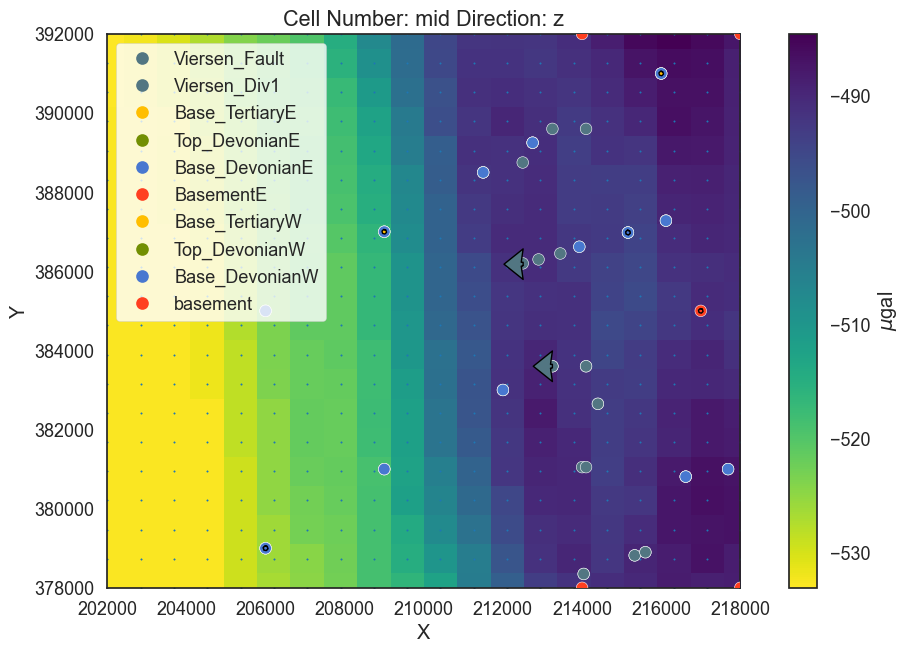

In [27]:
gp.plot_2d(geo_model, direction=['z'], height=7, show_results=False, show_data=True,
           show=False)
plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
plt.imshow(sol.fw_gravity.reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower')
cbar = plt.colorbar()
cbar.set_label(r'$\mu$gal')
plt.show()

In [25]:
geo_model

default_project 2023-06-21 14:20  2023-06-21 14:20

# Plotting lithologies

If we want to compute the lithologies we will need to create a normal
interpolator object as seen in the Chapter 1 of the tutorials




Now we can plot all together (change the alpha parameter to see the
gravity overlying):




sphinx_gallery_thumbnail_number = 4



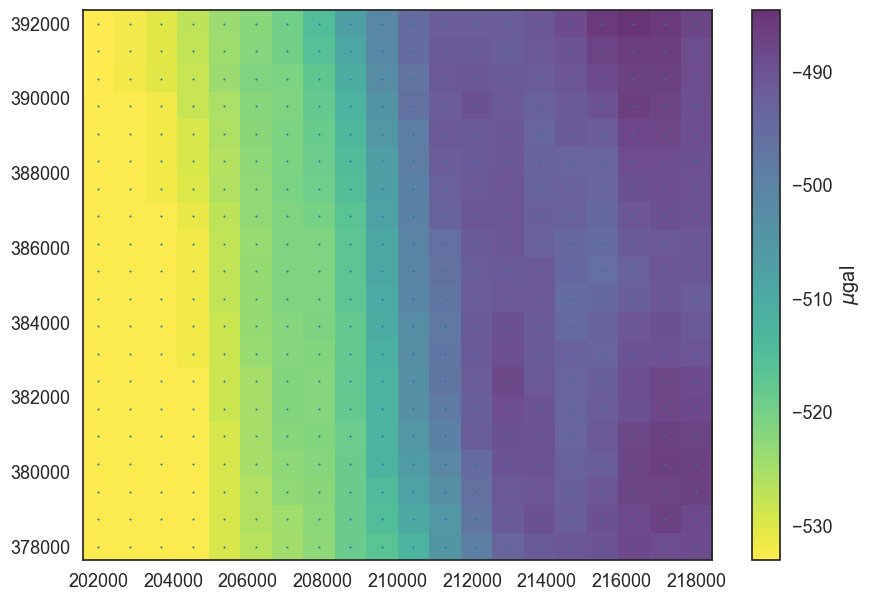

In [26]:
#gp.plot_2d(geo_model, cell_number=[-1], direction=['z'], show=False,
 #          kwargs_regular_grid={'alpha': .5})

plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
plt.imshow(grav.reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis_r', origin='lower', alpha=.8)
cbar = plt.colorbar()
cbar.set_label(r'$\mu$gal')
plt.show()